In [ ]:
!wget https://lodmedia.hb.bizmrg.com/case_files/1128664/train_dataset_cold_start_train.zip

--2024-09-27 12:14:30--  https://lodmedia.hb.bizmrg.com/case_files/1128664/train_dataset_cold_start_train.zip
Resolving lodmedia.hb.bizmrg.com (lodmedia.hb.bizmrg.com)... 95.163.53.117
Connecting to lodmedia.hb.bizmrg.com (lodmedia.hb.bizmrg.com)|95.163.53.117|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4477652786 (4.2G) [application/zip]
Saving to: ‘train_dataset_cold_start_train.zip’

train_dataset_cold_ 100%[===================>]   4.17G  19.2MB/s    in 3m 54s  

2024-09-27 12:18:25 (18.2 MB/s) - ‘train_dataset_cold_start_train.zip’ saved [4477652786/4477652786]



In [ ]:
!unzip train_dataset_cold_start_train.zip

Archive:  train_dataset_cold_start_train.zip
  inflating: logs_df_2024-08-05.parquet  
  inflating: logs_df_2024-08-06.parquet  
  inflating: video_stat.parquet      
  inflating: Состав датасета.docx  


In [1]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir("/content/drive/My Drive/Hacks24")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

df = pd.read_parquet('logs_df_2024-08-05.parquet', engine='pyarrow')

In [3]:
df.head()

,event_timestamp,user_id,region,city,video_id,watchtime
0,2024-08-05 12:12:32+03:00,bd1b6b07-e6a2-46ad-aa58-990bb7e89252,288eb079-1c29-4749-ab7e-550451a4d765,da903ff0-9eb8-4e91-b25d-22c70f962ca2,0af133e1-4fbf-4e10-b9e8-19fbe1a011c3,32
1,2024-08-05 18:30:15+03:00,7db026fc-b55c-4580-bc26-e3df59ba6c7c,f58ab76f-2581-447a-b95b-5832e8757054,8449a572-fd10-44ae-a899-af656e350ad9,4f42aab2-6238-4381-bb53-36213916e912,340
2,2024-08-05 12:35:16+03:00,5c94a654-f376-4529-b463-b62b6b50e8ca,2c1f4ce4-66e0-4481-a0ed-244bf76fa83a,93a12888-fdf4-4889-a1ef-3ef0537d674d,8b106b84-f3f5-4c27-820c-7e1546b43614,12
3,2024-08-05 20:48:51+03:00,b972399a-c4b9-47fe-88fa-ccb1827cd131,f28a922a-68b9-46ce-8b52-c0be09413514,a269faea-d63c-4196-9963-00c62b5b3264,305389f3-1c8d-4026-9eef-e2b875a35380,2460
5,2024-08-05 05:19:19+03:00,807fb9e8-0aac-4dd2-836b-48797681f4ff,09714619-66dc-4faa-acdf-b2ae9dd2549d,51c8f786-5661-4a9c-8ab2-5d52f31095de,caeb71a4-f0f6-4c6a-ac79-31bdbb58fef1,87


In [4]:
users = df['user_id'].unique()[:1000]

In [5]:
df = df[df['user_id'].isin(users)]

In [6]:
# df_2 = pd.read_parquet('logs_df_2024-08-06.parquet', engine='pyarrow')

In [7]:
# df_2.info()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 159942 entries, 0 to 34452993
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype                                
---  ------           --------------   -----                                
 0   event_timestamp  159942 non-null  datetime64[ms, pytz.FixedOffset(180)]
 1   user_id          159942 non-null  object                               
 2   region           159942 non-null  object                               
 3   city             159942 non-null  object                               
 4   video_id         116835 non-null  object                               
 5   watchtime        159942 non-null  int64                                
dtypes: datetime64[ms, pytz.FixedOffset(180)](1), int64(1), object(4)
memory usage: 8.5+ MB


In [9]:
from datetime import timedelta

In [10]:
df_video = pd.read_parquet('video_stat.parquet', engine='pyarrow')
df_video.head()

,video_id,v_pub_datetime,v_total_comments,v_year_views,v_month_views,v_week_views,v_day_views,v_likes,v_dislikes,v_duration,...,v_category_popularity_percent_7_days,v_category_popularity_percent_30_days,v_long_views_1_days,v_long_views_7_days,v_long_views_30_days,row_number,title,description,category_id,author_id
0,973f24c0-15b2-434f-8740-4e2726f79c30,2024-06-15 22:58:03+03:00,0,556,2,0,0,0,0,7.733,...,1.656386,1.616750,0,0,0,1,пережила свой яд,,Мультфильмы,79276150-fdaf-4626-9452-6f1ad975741d
1,1a3f527c-44b2-4f7e-9641-26f078edbf2e,2021-04-18 17:27:42+03:00,0,109,2,1,0,0,0,379.000,...,5.570802,5.649635,0,0,0,1,"🎓Знаете ли Вы, что ؟ Интересные факты ! # ...","🎓Знаете ли Вы, что ? Интересные факты ! # 2🎓...",Развлечения,16278647-5912-48af-a071-582dcfd0e354
2,2f563d09-45ef-4e27-8da0-daa74235a2e7,2022-11-17 16:36:43+03:00,0,163,2,2,0,0,0,1020.767,...,0.342614,0.285310,0,0,0,1,"ЗИМНЯЯ, ТЕПЛАЯ ШЛЯПА крючком. Как связать поля...",Шляпа связана из пряжи NAKO Sport Wool в 100гр...,Хобби,9afa94aa-c2a6-43fc-a0d1-175eaf7fa194
3,154fac0e-1794-4406-afa0-61f688e3a764,2010-01-01 00:00:01+03:00,0,10657,5227,1300,202,24,0,42.025,...,0.418336,0.513562,186,1162,4550,1,найк,найк дрессура,Животные,4af9b043-40f4-4288-85c6-192612dca35b
4,470b4e3e-e06d-4370-80dc-34d6a78b22db,2023-11-29 16:49:46+03:00,0,154,45,13,1,0,0,695.647,...,9.310358,9.290497,0,8,18,1,SHACMAN. Шакман замена двухрядного подшипника ...,,Разное,841e6bd8-0015-4502-a3e9-aaa07112a585


In [11]:
df_video.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1555687 entries, 0 to 1936085
Data columns (total 43 columns):
 #   Column                                 Non-Null Count    Dtype                                
---  ------                                 --------------    -----                                
 0   video_id                               1555687 non-null  object                               
 1   v_pub_datetime                         1555687 non-null  datetime64[ms, pytz.FixedOffset(180)]
 2   v_total_comments                       1555687 non-null  uint64                               
 3   v_year_views                           1555687 non-null  uint64                               
 4   v_month_views                          1555687 non-null  uint64                               
 5   v_week_views                           1555687 non-null  uint64                               
 6   v_day_views                            1555687 non-null  uint64                        

In [12]:
df_video = df_video.drop(columns=['row_number', 'title', 'description'])

In [13]:
all_data = pd.merge(df, df_video, how='inner', left_on='video_id', right_on='video_id')

In [14]:
all_data.head()

,event_timestamp,user_id,region,city,video_id,watchtime,v_pub_datetime,v_total_comments,v_year_views,v_month_views,...,v_frac_avg_watchtime_1_day_duration,v_frac_avg_watchtime_7_day_duration,v_frac_avg_watchtime_30_day_duration,v_category_popularity_percent_7_days,v_category_popularity_percent_30_days,v_long_views_1_days,v_long_views_7_days,v_long_views_30_days,category_id,author_id
0,2024-08-05 12:12:32+03:00,bd1b6b07-e6a2-46ad-aa58-990bb7e89252,288eb079-1c29-4749-ab7e-550451a4d765,da903ff0-9eb8-4e91-b25d-22c70f962ca2,0af133e1-4fbf-4e10-b9e8-19fbe1a011c3,32,2024-02-20 20:54:19+03:00,0,1128,341,...,0.621001,0.543400,0.585633,7.280147,7.123987,8,62,235,Сериалы,61a05a00-e54b-41f6-b876-b0908080f6ea
1,2024-08-05 18:30:15+03:00,7db026fc-b55c-4580-bc26-e3df59ba6c7c,f58ab76f-2581-447a-b95b-5832e8757054,8449a572-fd10-44ae-a899-af656e350ad9,4f42aab2-6238-4381-bb53-36213916e912,340,2024-07-08 13:07:53+03:00,7,61676,51113,...,0.233007,0.214809,0.234108,7.201798,10.617716,0,1787,16866,Сериалы,439a1647-8a48-4a76-8d7d-64fcd3337038
2,2024-08-05 07:56:56+03:00,ee434737-ce4f-441d-82db-6401ce26452b,da18c360-d95c-4a44-b1e7-dc5a7e4420f8,e68acd2e-1784-4740-b3a0-15a1a051c78c,4f42aab2-6238-4381-bb53-36213916e912,15,2024-07-08 13:07:53+03:00,7,61676,51113,...,0.233007,0.214809,0.234108,7.201798,10.617716,0,1787,16866,Сериалы,439a1647-8a48-4a76-8d7d-64fcd3337038
3,2024-08-05 18:27:21+03:00,7db026fc-b55c-4580-bc26-e3df59ba6c7c,f58ab76f-2581-447a-b95b-5832e8757054,8449a572-fd10-44ae-a899-af656e350ad9,4f42aab2-6238-4381-bb53-36213916e912,17,2024-07-08 13:07:53+03:00,7,61676,51113,...,0.233007,0.214809,0.234108,7.201798,10.617716,0,1787,16866,Сериалы,439a1647-8a48-4a76-8d7d-64fcd3337038
4,2024-08-05 07:58:07+03:00,ee434737-ce4f-441d-82db-6401ce26452b,da18c360-d95c-4a44-b1e7-dc5a7e4420f8,e68acd2e-1784-4740-b3a0-15a1a051c78c,4f42aab2-6238-4381-bb53-36213916e912,3098,2024-07-08 13:07:53+03:00,7,61676,51113,...,0.233007,0.214809,0.234108,7.201798,10.617716,0,1787,16866,Сериалы,439a1647-8a48-4a76-8d7d-64fcd3337038


In [15]:
from sklearn.preprocessing import OrdinalEncoder
import numpy as np

oe = OrdinalEncoder(dtype=np.uint64)

In [16]:
all_data = all_data.drop(columns=['user_id', 'video_id'])

In [17]:
for col in ['region', 'city', 'category_id', 'author_id']:
  all_data[col] = oe.fit_transform(all_data[[col]])

In [18]:
def create_long_watch(row):
  if row['v_duration'] <= 300 and row['watchtime'] >= 30:
    return True
  elif row['watchtime'] >= row['v_duration'] * 0.25:
    return True
  return False


all_data['long_watch'] = all_data[['watchtime', 'v_duration']].apply(lambda row: create_long_watch(row), axis=1)

In [19]:
all_data['long_watch'] = all_data['long_watch'].astype(int)

In [20]:
all_data['long_watch'].value_counts()

,count
long_watch,
1,69770
0,47065


In [21]:
all_data['event_timestamp'][0]

Timestamp('2024-08-05 12:12:32+0300', tz='pytz.FixedOffset(180)')

In [22]:
all_data['event_timestamp'] = all_data['event_timestamp'].astype(int)
all_data['v_pub_datetime'] = all_data['v_pub_datetime'].astype(int)

In [23]:
Y = all_data['long_watch'].values
X_train = all_data.drop(columns=['long_watch', 'watchtime', 'v_duration'])

In [24]:
X_train

,event_timestamp,region,city,v_pub_datetime,v_total_comments,v_year_views,v_month_views,v_week_views,v_day_views,v_likes,...,v_frac_avg_watchtime_1_day_duration,v_frac_avg_watchtime_7_day_duration,v_frac_avg_watchtime_30_day_duration,v_category_popularity_percent_7_days,v_category_popularity_percent_30_days,v_long_views_1_days,v_long_views_7_days,v_long_views_30_days,category_id,author_id
0,1722849152000,25,368,1708451659000,0,1128,341,97,11,1,...,0.621001,0.543400,0.585633,7.280147,7.123987,8,62,235,30,1973
1,1722871815000,170,219,1720433273000,7,61676,51113,7565,1157,85,...,0.233007,0.214809,0.234108,7.201798,10.617716,0,1787,16866,30,1339
2,1722833816000,149,392,1720433273000,7,61676,51113,7565,1157,85,...,0.233007,0.214809,0.234108,7.201798,10.617716,0,1787,16866,30,1339
3,1722871641000,170,219,1720433273000,7,61676,51113,7565,1157,85,...,0.233007,0.214809,0.234108,7.201798,10.617716,0,1787,16866,30,1339
4,1722833887000,149,392,1720433273000,7,61676,51113,7565,1157,85,...,0.233007,0.214809,0.234108,7.201798,10.617716,0,1787,16866,30,1339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116830,1722855877000,143,215,1715696665000,0,859,297,104,9,1,...,0.610775,0.773216,0.759796,1.750770,1.681567,0,79,236,18,2407
116831,1722859696000,170,369,1719496862000,245,458956,135586,18774,2878,754,...,0.505066,0.517563,0.502267,11.540217,17.117076,0,9537,80217,33,2447
116832,1722841562000,15,211,1713055540000,0,103,103,40,11,0,...,0.882374,0.637956,0.560159,4.227043,3.808684,11,33,75,28,1242
116833,1722854430000,173,120,1713364659000,1,6714,2479,664,121,36,...,0.315899,0.315006,0.314710,5.934075,5.857127,0,279,1074,36,1730


In [25]:
from lightgbm import LGBMClassifier


gbm = LGBMClassifier(
    random_state=42
)

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [26]:
gbm.fit(X_train, Y)

[LightGBM] [Info] Number of positive: 69770, number of negative: 47065
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.023614 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8089
[LightGBM] [Info] Number of data points in the train set: 116835, number of used features: 39
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.597167 -> initscore=0.393674
[LightGBM] [Info] Start training from score 0.393674


LGBMClassifier(random_state=42)

In [27]:
gbm.score(X_train, Y)

0.9652415800059914

In [28]:
import lightgbm
import matplotlib.pyplot as plt

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

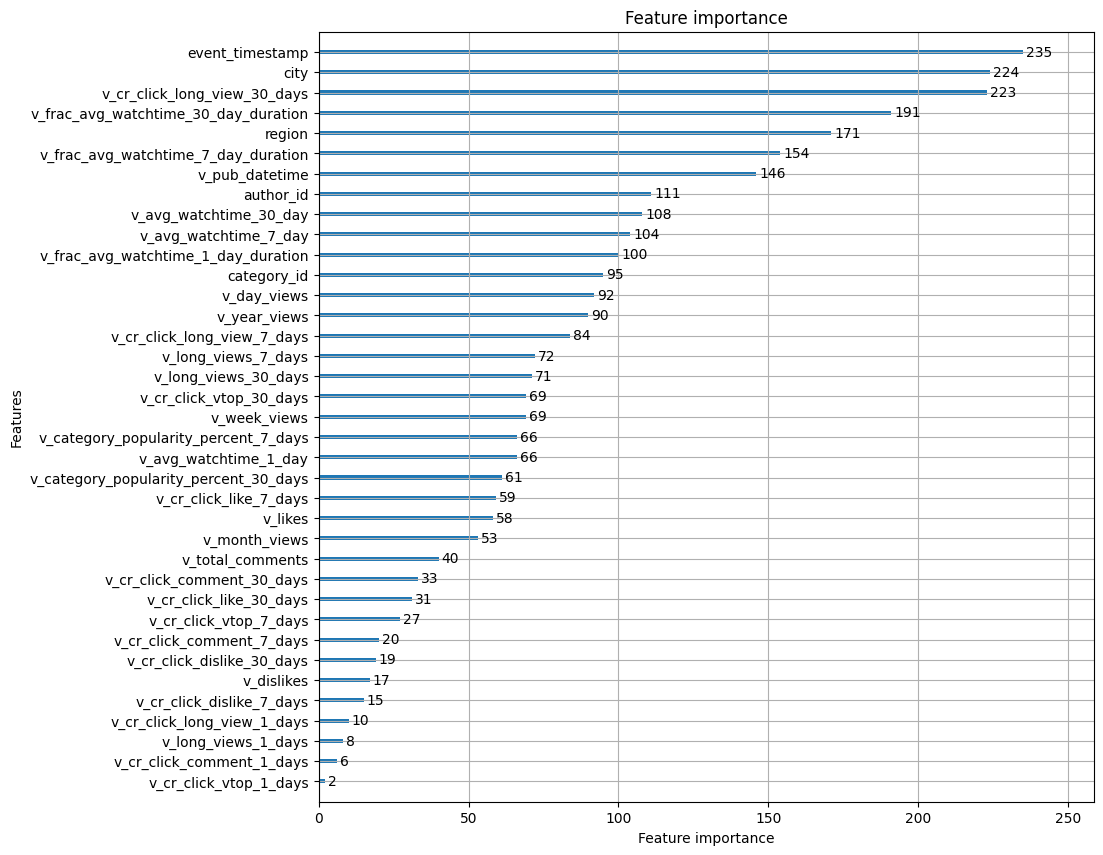

In [29]:
fig, ax = plt.subplots(figsize=(10,10))
lightgbm.plot_importance(gbm, ax=ax)

<Axes: >

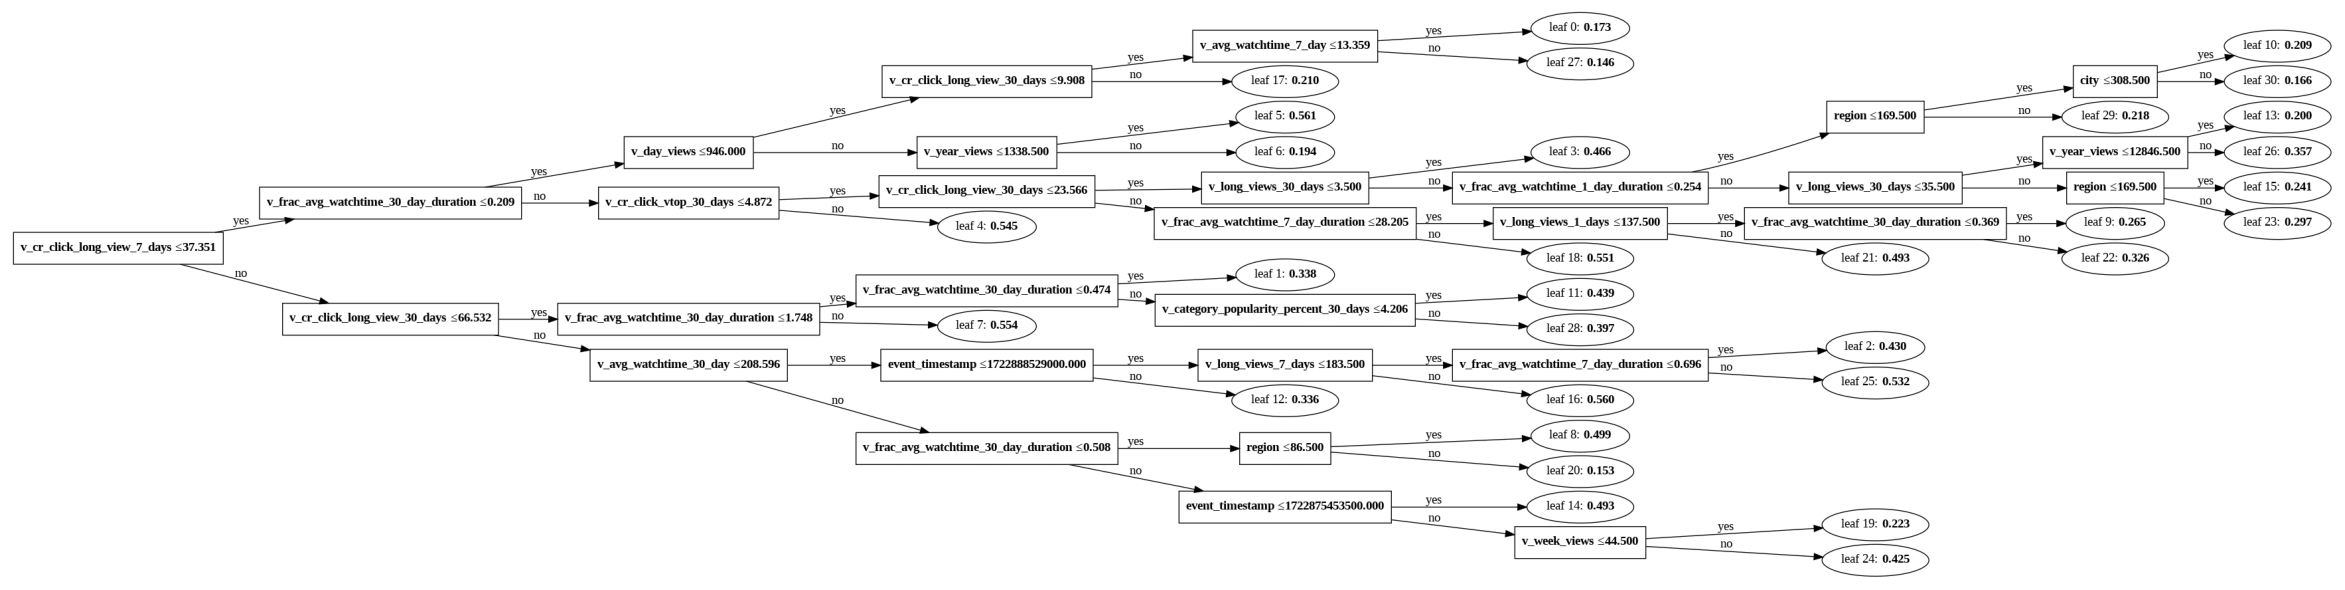

In [34]:
lightgbm.plot_tree(gbm, figsize = (30,25))